In [74]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn import preprocessing
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn import model_selection
from xgboost.sklearn import XGBClassifier


from sklearn.model_selection import train_test_split

In [75]:
df = pd.read_csv('https://raw.githubusercontent.com/Sakthi121/voice-pathelogy/main/data.csv')

In [76]:
df.head()

,name,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,status
0,phon_R01_S01_1,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.06545,0.02211,21.033,0.414783,0.815285,0.284654,1
1,phon_R01_S01_2,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.09403,0.01929,19.085,0.458359,0.819521,0.368674,1
2,phon_R01_S01_3,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.08270,0.01309,20.651,0.429895,0.825288,0.332634,1
3,phon_R01_S01_4,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.08771,0.01353,20.644,0.434969,0.819235,0.368975,1
4,phon_R01_S01_5,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.10470,0.01767,19.649,0.417356,0.823484,0.410335,1


In [77]:
df.shape

(951, 17)

<Axes: >

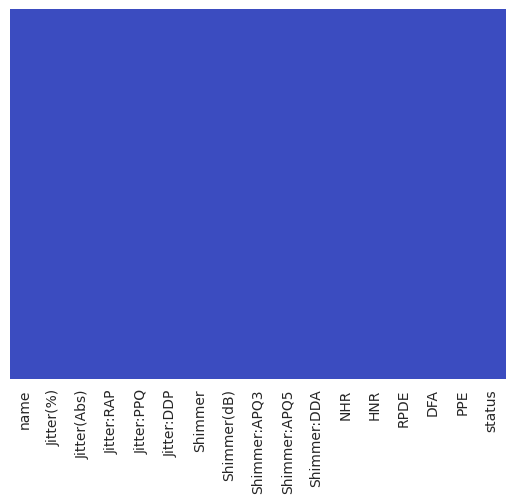

In [80]:
sns.heatmap(df.isna(),yticklabels=False, cbar=False, cmap='coolwarm')

# Data Visuals After Removing Columns

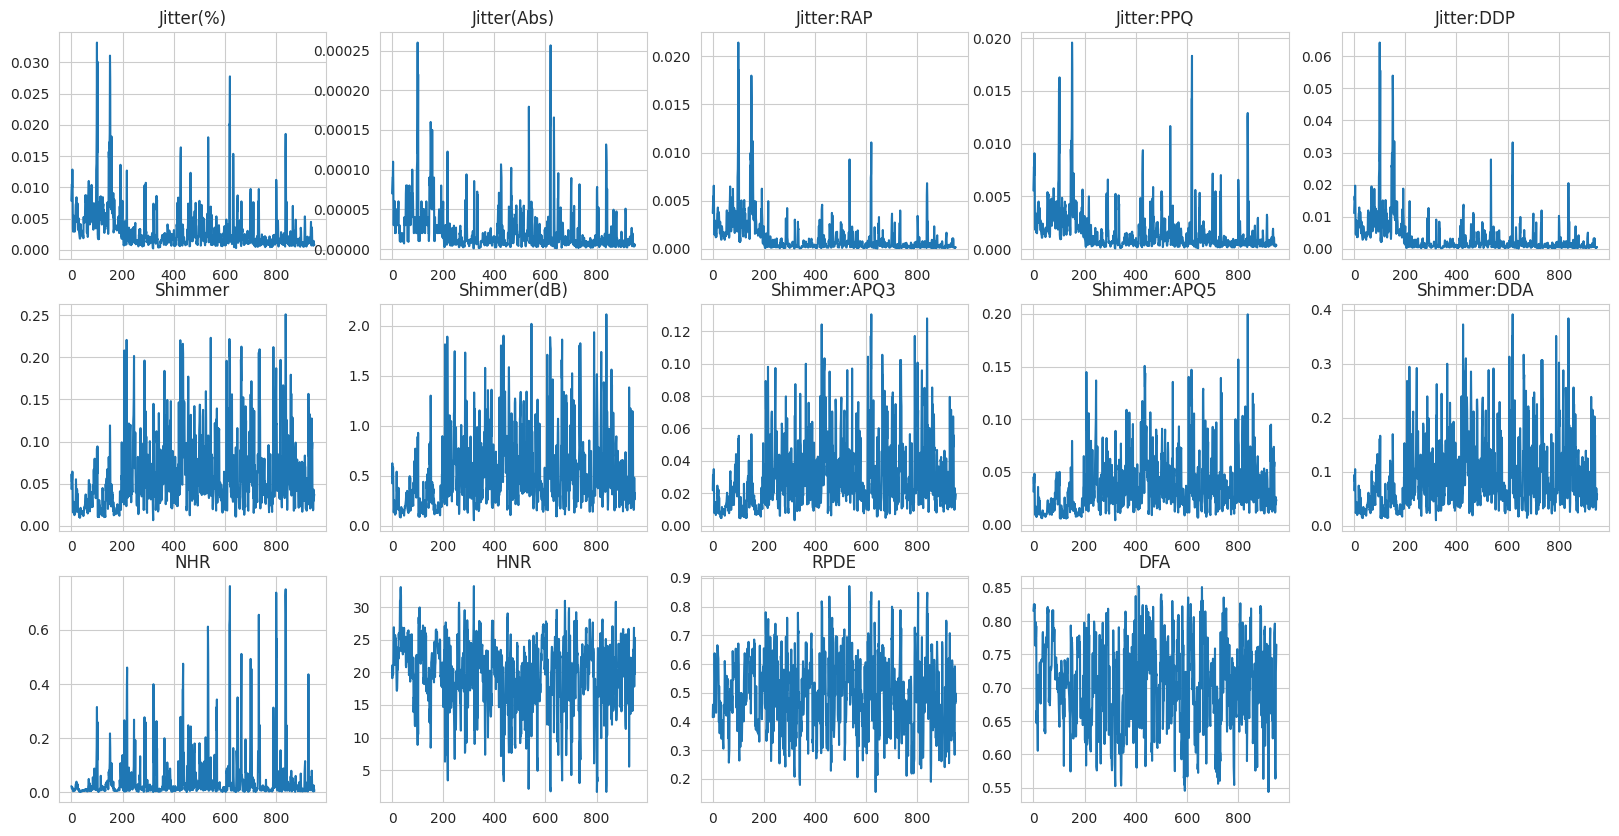

In [81]:
plt.figure(figsize=(20,10))
for j,i in enumerate(data.columns.values):
    plt.subplot(3,5,j+1)
    plt.plot(data[i].values)
    plt.title(f'{i}')

# Summary Statistics Plot

In [82]:
desc = data.describe().transpose()


In [83]:
desc_copy = desc.reset_index(drop=True).drop('count', axis=1)


[]

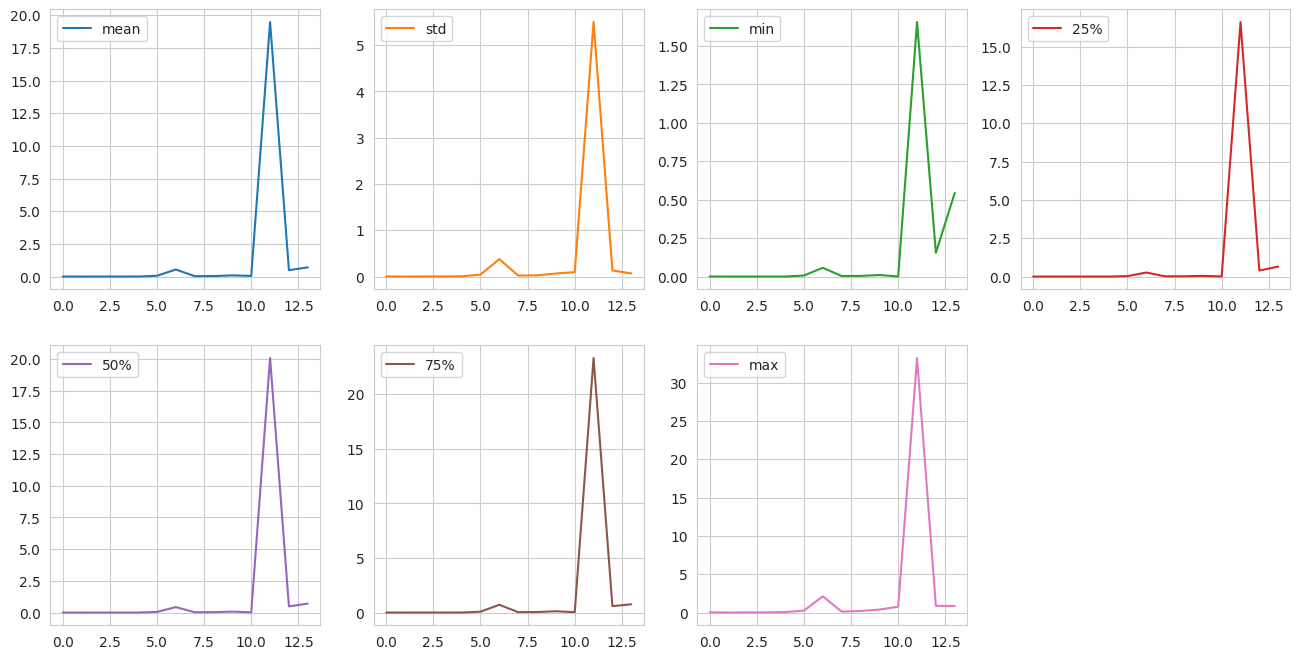

In [84]:
desc_copy.plot(kind='line', subplots=True, figsize=(16,8),
              layout=(-1, 4), sharex=False)
plt.plot()

# Standardisation

In [86]:

scaler = preprocessing.StandardScaler()

standerdise_data = scaler.fit_transform(data)

In [87]:
standerdise_data = pd.DataFrame(standerdise_data, columns=data.columns)

In [88]:
standerdise_data

,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR,RPDE,DFA
0,1.320836,1.702385,1.312240,1.816570,1.310455,-0.379977,-0.303385,-0.399938,-0.192160,-0.400092,-0.247340,0.282675,-0.580892,1.652024
1,1.836098,2.059402,1.802829,2.475958,1.801034,0.038264,0.229104,0.036767,0.331035,0.036920,-0.276855,-0.071937,-0.248779,1.714931
2,2.065726,2.416418,2.210792,2.870662,2.212432,-0.175847,-0.154288,-0.136172,0.082253,-0.136325,-0.341747,0.213136,-0.465716,1.800573
3,1.917308,2.416418,1.993900,2.485245,1.992101,-0.114299,-0.061102,-0.059565,0.137664,-0.059718,-0.337141,0.211862,-0.427045,1.710683
4,2.721005,3.130451,2.784005,3.460395,2.785635,0.107416,0.117281,0.200072,0.446756,0.200074,-0.293811,0.030733,-0.561282,1.773782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,-0.695407,-0.690696,-0.557159,-0.653811,-0.557189,-0.956721,-0.982308,-0.910955,-0.897042,-0.910959,-0.451842,1.334861,-1.578790,-2.086330
947,-0.474181,-0.564669,-0.515847,-0.565583,-0.517598,-0.399701,-0.154288,-0.342597,-0.382139,-0.342751,-0.211660,-0.305494,0.769301,-2.064945
948,-0.661803,-0.658565,-0.541667,-0.616662,-0.539975,-0.711718,-0.737363,-0.668291,-0.649768,-0.668446,-0.431862,0.823695,-0.174158,0.286757
949,-0.616998,-0.609653,-0.510683,-0.565583,-0.508991,-0.575314,-0.609566,-0.579298,-0.486929,-0.579301,-0.353877,0.041109,0.055095,0.666184


In [89]:
standerdise_desc = standerdise_data.describe().transpose()

In [90]:
standerdise_desc_copy = standerdise_desc.reset_index(drop=True).drop('count', axis=1)

In [91]:
standerdise_desc_copy

,mean,std,min,25%,50%,75%,max
0,0.000000e+00,1.000526,-0.815822,-0.563791,-0.325763,0.161496,8.411291
1,-1.344876e-16,1.000526,-0.772239,-0.581628,-0.375451,0.251113,8.485698
2,0.000000e+00,1.000526,-0.588144,-0.505518,-0.371252,0.121918,10.473332
3,-2.988613e-17,1.000526,-0.732751,-0.547008,-0.356622,0.144884,8.336147
4,0.000000e+00,1.000526,-0.589894,-0.505549,-0.371285,0.122737,10.474817
5,2.092029e-16,1.000526,-1.263511,-0.719916,-0.270664,0.414800,4.545522
6,-2.988613e-17,1.000526,-1.285827,-0.741357,-0.290073,0.458074,4.190822
7,5.977226e-17,1.000526,-1.247199,-0.734118,-0.273789,0.432645,4.585924
8,1.046015e-16,1.000526,-1.215557,-0.700655,-0.284134,0.411324,6.148379
9,-1.046015e-16,1.000526,-1.247358,-0.734121,-0.273637,0.432571,4.586100


# Statistical Summary Plot on Standardise Data

[]

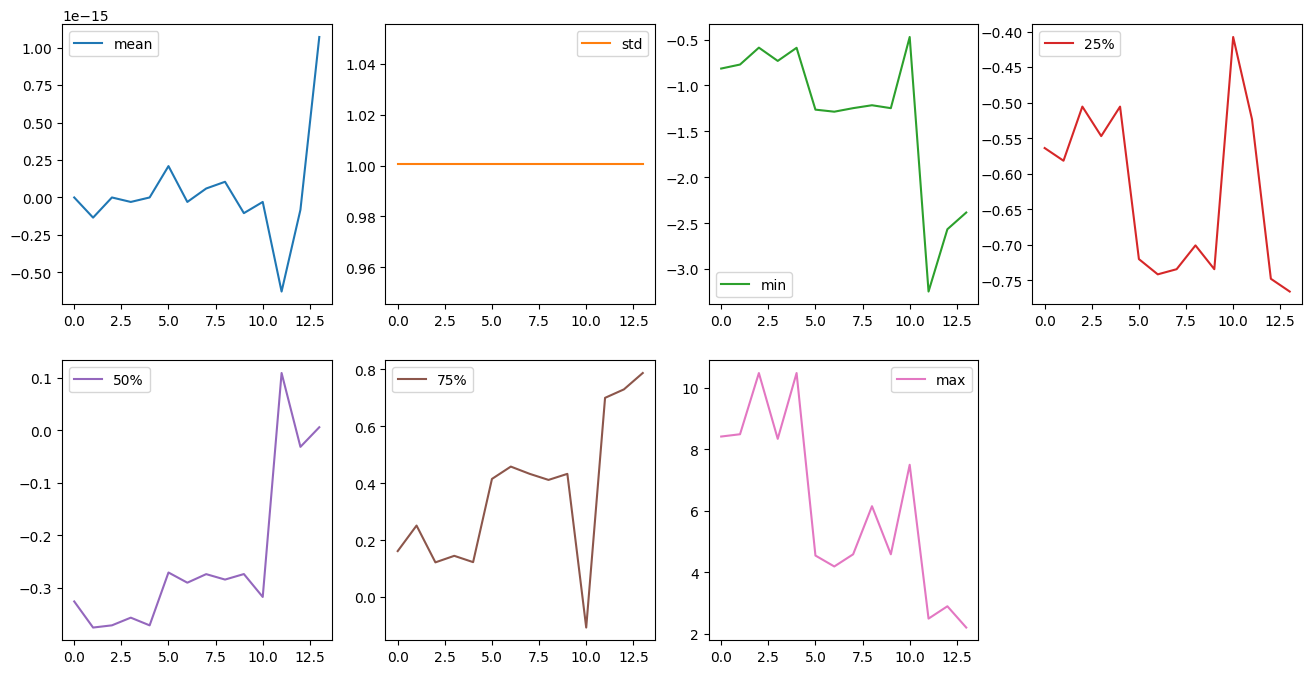

In [43]:
standerdise_desc_copy.plot(kind='line', subplots=True, figsize=(16,8),
              layout=(-1, 4), sharex=False)
plt.plot()

# Preparing inputs and ouputs

In [44]:
X = standerdise_data
y = label

In [45]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.5)

In [92]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train)



SVC(kernel='linear', random_state=42)

In [93]:

y_pred = svm_classifier.predict(X_test)

# Accuracy assessment
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7412587412587412


# Comparison of Different Classification Models

In [94]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.5)

In [95]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    #Nearest Neighbor

    #SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),

    #Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),


    #xgboost
    XGBClassifier()
    ]

In [96]:
MLA_compare = []


for alg in MLA:
    alg.fit(train_X, train_y)
    y_pred=alg.predict(test_X)
    score=accuracy_score(test_y, y_pred)
    MLA_compare.append((str(alg).split('(')[0],score))
MLA_compare = sorted(MLA_compare, key=lambda x: x[1], reverse=True)

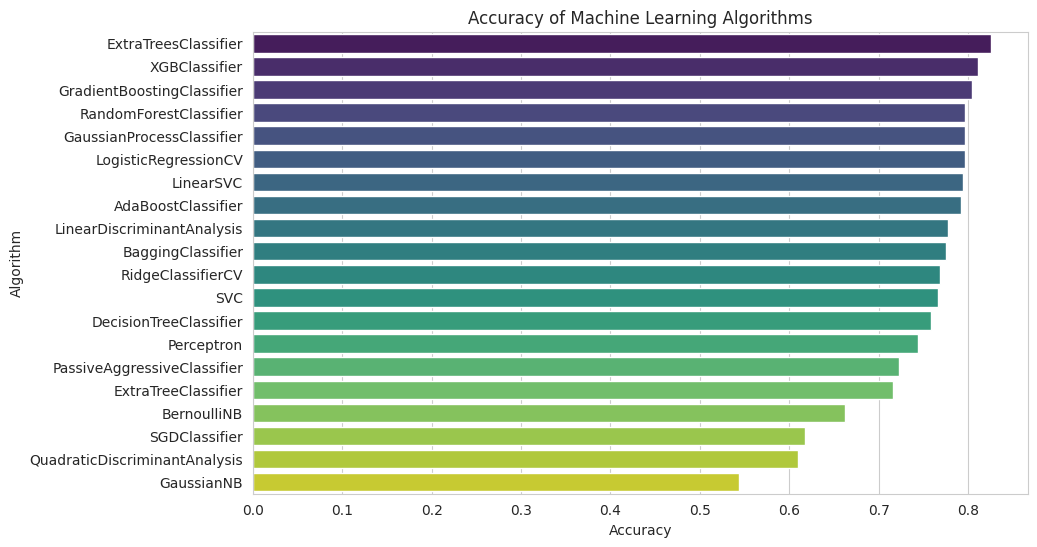

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
MLA_compare_df = pd.DataFrame(MLA_compare, columns=['Algorithm', 'Accuracy'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Algorithm', data=MLA_compare_df, palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.title('Accuracy of Machine Learning Algorithms')
plt.show()


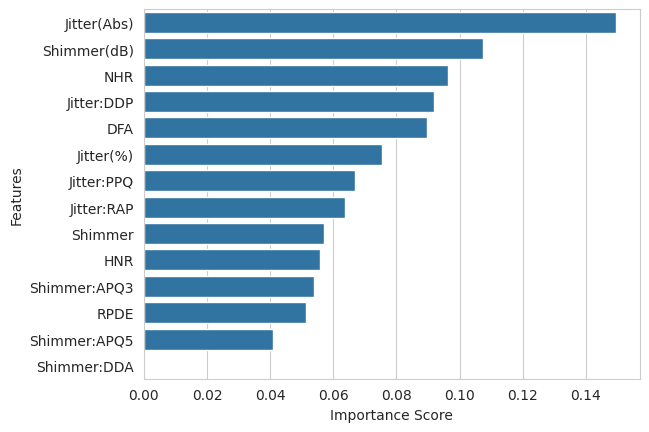

In [98]:
imp_score = pd.DataFrame(clf.feature_importances_, columns=['Importance Score'])
features = pd.DataFrame(data.columns, columns=['Features'])
feature_imp = pd.concat([features,imp_score], axis=1)
feature_imp = feature_imp.sort_values(by='Importance Score', ascending=False)
sns.barplot(x=feature_imp['Importance Score'], y=feature_imp['Features'])
plt.show()

In [67]:
reduced_X = X[feature_imp.Features[:5]]
reduced_X.head()


,Jitter(Abs),Shimmer(dB),NHR,Jitter:DDP,DFA
0,1.702385,-0.303385,-0.247340,1.310455,1.652024
1,2.059402,0.229104,-0.276855,1.801034,1.714931
2,2.416418,-0.154288,-0.341747,2.212432,1.800573
3,2.416418,-0.061102,-0.337141,1.992101,1.710683
4,3.130451,0.117281,-0.293811,2.785635,1.773782


In [68]:
reduced_X = X[feature_imp.Features[:5]]
reduced_X.head()

,Jitter(Abs),Shimmer(dB),NHR,Jitter:DDP,DFA
0,1.702385,-0.303385,-0.247340,1.310455,1.652024
1,2.059402,0.229104,-0.276855,1.801034,1.714931
2,2.416418,-0.154288,-0.341747,2.212432,1.800573
3,2.416418,-0.061102,-0.337141,1.992101,1.710683
4,3.130451,0.117281,-0.293811,2.785635,1.773782


In [70]:
train_X, test_X, train_y, test_y = train_test_split(reduced_X,y,test_size=0.5)

In [71]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    #Nearest Neighbor

    #SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),

    #Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),


    #xgboost
    XGBClassifier()
    ]

In [72]:
MLA_compare = []


for alg in MLA:
    alg.fit(train_X, train_y)
    y_pred=alg.predict(test_X)
    score=accuracy_score(test_y, y_pred)
    MLA_compare.append((str(alg).split('(')[0],score))
MLA_compare = sorted(MLA_compare, key=lambda x: x[1], reverse=True)

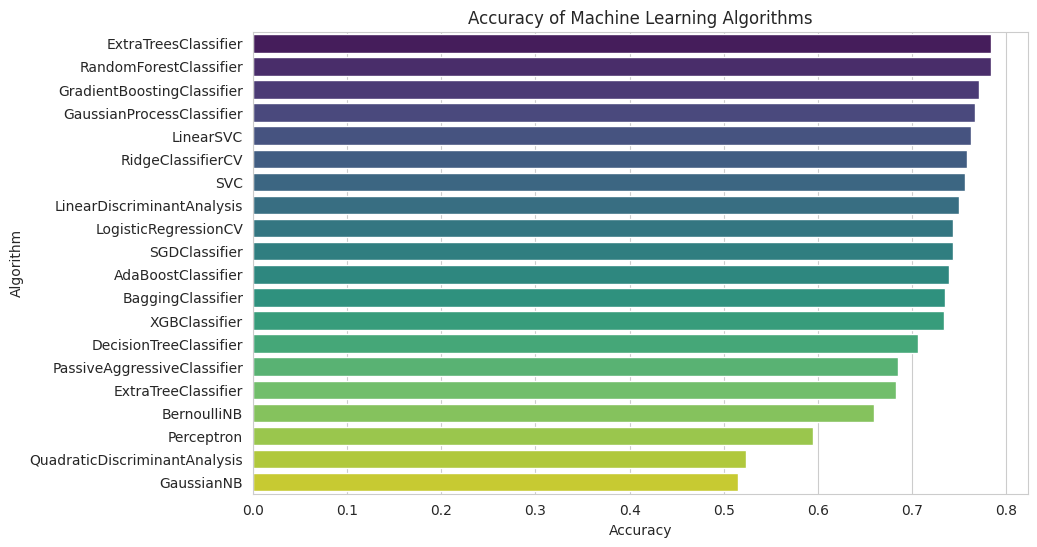

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
MLA_compare_df = pd.DataFrame(MLA_compare, columns=['Algorithm', 'Accuracy'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Algorithm', data=MLA_compare_df, palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.title('Accuracy of Machine Learning Algorithms')
plt.show()
